<a href="https://colab.research.google.com/github/julvc/python_diplo/blob/master/Julio_Varas_MP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Miniproyecto 1: ¡Bienvenido a tu nueva empresa!
#### **Curso:** Introducción a Minería de Datos y Machine Learning

---

**¡Bienvenido a AMAZOFF!**

Has sido seleccionado para unirte al equipo de E-commerce como Data Scientist Junior.

Después de integrarte al equipo, te han asignado tu primera misión:

> Trabajar con una base de datos antigua y descuidada que durante años nadie ha limpiado ni analizado.

Tu tarea es realizar un preprocessing de alta calidad para convertir estos datos en información valiosa que respalde
decisiones estratégicas.

La base de datos contiene información crucial sobre clientes, productos y transacciones, pero está plagada de
inconsistencias, datos faltantes y otros problemas que dificultan su uso.

El reto es mayor porque los resultados de tu análisis y las respuestas a las preguntas de negocio serán presentados
directamente al CEO de AMAZOFF.

Por lo tanto, debes aplicar tus conocimientos técnicos y comprender cómo tus hallazgos se alinean con las necesidades y
objetivos de la empresa.

**¿Estás listo para asumir tu nueva misión y demostrar que puedes hacer la diferencia en AMAZOFF?**

¡Es hora de empezar y transformar esos datos en información estratégica para el negocio!

# Pauta de Evaluación

Este MP1 está enfocado en responder preguntas de negocio relevantes para **AMAZOFF**.

### Preguntas de Negocio

1. (20 puntos) Tu líder de equipo necesitará explicar qué información contiene la base de datos al CEO de la empresa. ¿Podrías explicarle qué información contienen los datos?
2. (25 puntos) ¡Habemus data! Me dicen que los datos estaban muy sucios... ¿podrías corregir esto?
3. (15 puntos) ¡Me encantan los datos limpios! Pero es mucha data. ¿Podrías hacer algunos gráficos interesantes para el equipo de Marketing?
4. (15 puntos) Marketing ama los gráficos. Pero el CEO es una persona de números. Te pide un informe con 3 estadísticas MUY interesantes y NUEVAS de los datos.
5. (10 puntos) [ ERROR ] Detectamos que el rating va de 1-5, pero nuestros sistemas solo toleran ratings normalizados. ¿Nos puedes ayudar?
6. (15 puntos) El CEO está interesado en simplificar el análisis de datos complejos sin perder información crucial. ¿Puedes aplicar una técnica de reducción de dimensionalidad como PCA y explicar los resultados?

### Tener en consideración:

En caso de que el código esté bien, pero no se responda (usando celdas de texto) la pregunta de negocio (sección **Explicación**), **se asignará máximo la mitad de puntos** de esa pregunta.

> Al principio de la pregunta 3 tendrás la opción de descomentar un código (dando una explicación) que te permitirá utilizar la base de datos `output.csv` como `df`. Esto, en caso de que la pregunta 2 la encuentres muy difícil. Sin embargo, esto automáticamente te pondrá 0 puntos en la pregunta 2. Sin dar una explicación de por qué utilizarás esta opción, el tutor corrector puede comentar nuevamente la celda y queda `df` según lo realizado en la pregunta 2. ¡Ten cuidado!

El miniproyecto está diseñado para completar código. Suba el notebook solo con el código para responder la pregunta de negocio.

> # ¡NO OLVIDES GUARDAR Y SUBIR EL NOTEBOOK A LA PLATAFORMA CUANDO TERMINES! FORMATO .ipynb

# Preámbulo

In [202]:
# Machine Learning
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA

# General Data Science
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [203]:
# Esta configuración permite que los dataframes se muestren completos.
pd.set_option('display.max_columns', None)

# 1. Tu líder de equipo necesitará explicar qué información contiene la base de datos al CEO de la empresa. ¿Podrías explicarle qué información contienen los datos?

⁉️ **Consideración:** Los datos vienen divididos en tres bases de datos: `order`, `product` y `delivery`. Estas tienen en común algo que nos servirá para unirlas utilizando el método `join`. Une las tres bases de datos, mira qué datos hay, elimina las columnas que no utilizarás y reordenalas correctamente según `output.csv`. ¡No olvides explicar qué información contienen los datos!

ℹ️ **HINT:** ¿Para qué sirve el parámetro `r_suffix` del método `join`? ¿Qué información nos da `df.info()`?

📖 **Referencia Externa:** [Método `join`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html).

---

✅ **Explicación:**

Los datos presentados unen las bases de datos de order, product y delivery a traves del campo order, este es el campo primario que unifica todas las bases. Se ordenan las tablas para una mejor lectura y mencionar que aun falta realizar una limpieza de datos pero puede visualizar en forma global una idea de los datos que contiene

In [204]:
order = pd.read_csv('raw_ecommerce_order.csv', index_col=0)
order.head(2)

,city,payment,seller,estimated_delivery,state,rating,customer,order
0,campinas,credit card,2.0,2018-01-30,SP,4.5,27313.0,27313.0
1,UNKNOWN,OTHER,7.0,2017-04-17 12:00:00,SP,1.0,47584.0,47584.0


In [205]:
product = pd.read_csv('raw_ecommerce_product.csv', index_col=0)
product.head(2)

,precio,shipping,product,customer,category,seller,order
0,232.99,86.85,5.0,31453.0,toys,21.0,31453.0
1,383.5,2.94,5.0,55708.0,technology,10.0,55708.0


In [206]:
delivery = pd.read_csv('raw_ecommerce_delivery.csv', index_col=0)
delivery.head(2)

,order,purchased,delivered,shipping,estimated_delivery,product
0,23487.0,2018-03-10 23:29:10,2018-03-23 15:58:23,133.52,NaN,6.0
1,11275.0,2018-01-19 13:39:35,2018-02-01 17:22:51,31.94,2018-02-15 12:00:00,7.0


In [207]:
df = order.join(product.set_index('order'),rsuffix='_product', on='order')
df = df.join(delivery.set_index('order'),rsuffix='_delivery', on='order')
df

,city,payment,seller,estimated_delivery,state,rating,customer,order,precio,shipping,product,customer_product,category,seller_product,purchased,delivered,shipping_delivery,estimated_delivery_delivery,product_delivery
0,campinas,credit card,2.0,2018-01-30,SP,4.5,27313.0,27313.0,1094.04,58.02,8.0,27313.0,technology,2.0,2018-01-14 22:31:54,2018-01-22 16:03:40,58.02,2018-01-30,8.0
1,UNKNOWN,OTHER,7.0,2017-04-17 12:00:00,SP,1.0,47584.0,47584.0,76.6,55.54,0.0,47584.0,fashion,7.0,2017-03-25 15:33:43,VALORES EM FALTA,55.54,2017-04-17 12:00:00,0.0
1,UNKNOWN,OTHER,7.0,2017-04-17 12:00:00,SP,1.0,47584.0,47584.0,76.6,55.54,0.0,47584.0,fashion,7.0,2017-03-25 15:33:43,2017-03-30 17:47:57,55.54,2017-04-17 12:00:00,0.0
1,UNKNOWN,OTHER,7.0,2017-04-17 12:00:00,SP,1.0,47584.0,47584.0,76.6,55.54,0.0,47584.0,fashion,7.0,2017-03-25 15:33:43,NaN,NaN,nones,0.0
1,UNKNOWN,OTHER,7.0,2017-04-17 12:00:00,SP,1.0,47584.0,47584.0,76.6,55.54,0.0,47584.0,FASHION,7.0,2017-03-25 15:33:43,VALORES EM FALTA,55.54,2017-04-17 12:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,UNKNOWN,OTHER,8.0,2017-12-22 12:00:00,SP,1.5,61074.0,61074.0,10.6,29.28,12.0,61074.0,TOYS,8.0,2017-11-30 16:57:01,2017-12-05 19:42:38,29.28,2017-12-22 12:00:00,12.0
1800,unknown,valores em falta,8.0,2018-05-22,rj,4.5,60166.0,60166.0,239.8,69.82,8.0,60166.0,health,8.0,2018-05-02 12:02:02,2018-05-10 18:10:52,69.82,2018-05-22,8.0
1800,unknown,valores em falta,8.0,2018-05-22,rj,4.5,60166.0,60166.0,239.8,69.82,8.0,60166.0,health,8.0,2018-05-02 12:02:02,2018-05-10 18:10:52,69.82,2018-05-22,8.0
1800,unknown,valores em falta,8.0,2018-05-22,rj,4.5,60166.0,60166.0,239.8,69.82,8.0,60166.0,health,8.0,2018-05-02 12:02:02,2018-05-10 18:10:52,69.82,2018-05-22,8.0


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7987 entries, 0 to 1800
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         7614 non-null   object 
 1   payment                      7556 non-null   object 
 2   seller                       7987 non-null   float64
 3   estimated_delivery           7172 non-null   object 
 4   state                        7646 non-null   object 
 5   rating                       7586 non-null   object 
 6   customer                     7987 non-null   float64
 7   order                        7987 non-null   float64
 8   precio                       7719 non-null   object 
 9   shipping                     7662 non-null   object 
 10  product                      7987 non-null   float64
 11  customer_product             7987 non-null   float64
 12  category                     7571 non-null   object 
 13  seller_product         

In [209]:
drop_columns = [
    'seller_product',
    'estimated_delivery_delivery',
    'customer_product',
    'shipping_delivery',
    'product_delivery'
]

df.drop(columns=drop_columns, inplace=True, errors='ignore')
df.head(2)

,city,payment,seller,estimated_delivery,state,rating,customer,order,precio,shipping,product,category,purchased,delivered
0,campinas,credit card,2.0,2018-01-30,SP,4.5,27313.0,27313.0,1094.04,58.02,8.0,technology,2018-01-14 22:31:54,2018-01-22 16:03:40
1,UNKNOWN,OTHER,7.0,2017-04-17 12:00:00,SP,1.0,47584.0,47584.0,76.6,55.54,0.0,fashion,2017-03-25 15:33:43,VALORES EM FALTA


In [210]:
correct_order = [
    'order',
    'product',
    'seller',
    'customer',
    'city',
    'state',
    'category',
    'precio',
    'shipping',
    'payment',
    'purchased',
    'delivered',
    'estimated_delivery',
    'rating'
]
df = df[correct_order]
df.head(2)

,order,product,seller,customer,city,state,category,precio,shipping,payment,purchased,delivered,estimated_delivery,rating
0,27313.0,8.0,2.0,27313.0,campinas,SP,technology,1094.04,58.02,credit card,2018-01-14 22:31:54,2018-01-22 16:03:40,2018-01-30,4.5
1,47584.0,0.0,7.0,47584.0,UNKNOWN,SP,fashion,76.6,55.54,OTHER,2017-03-25 15:33:43,VALORES EM FALTA,2017-04-17 12:00:00,1.0


# 2. ¡Habemus data! Me dicen que los datos estaban muy sucios... ¿podrías corregir esto?

⁉️ **Consideración:** Deberás verificar datos faltantes, duplicados, tipos de datos incorrectos, etc. Completa el código en las celdas para realizar esto. Explica cada paso de la limpieza. Se te entregó una base de datos llamada `output.csv`. El resultado de tu limpieza debería intentar generar "exactamente" esta base de datos.

ℹ️ **HINT 1:** En el tratamiento de las fechas podría haber ligeras discrepancias con `output.csv`. No se descontará mientras sean ligeras.

ℹ️ **HINT 2:** En la columna *city*, el valor `unknown` no lo consideres dato faltante.

ℹ️ **HINT 3:** ¿Hay una hora fija para la estimación de las entregas?

📖 **Referencia Externa:** [Pandas Data Preprocessing](https://medium.com/@sujathamudadla1213/pandas-data-preprocessing-methods-e4fcee1de88b).

---

✅ **Explicación:**

- Lo primero realizado fue normalizar los nombres, casi todas las columnas estan en ingles por ende, de haber palabras en español se deben traducir.

- Luego para una mejor lectura, se traspasa todos los valores a miniscula, ya que habian valores en capital case y mayusculas, esto ayudara a leer mejor la informacion

- Hay que reemplazar los valores poco legibles o que no entregan información, es por ello que se busca aquellos valores y se unifican para luego revisar columna por columna pasos para resolver estos valores

- Se eliminan las filas con datos duplicados para evitar problemas de interpretacion

- Los valores numericos poseen caracteres que no necesariamente aportan a la lectura para saber si es un precio y/o similar, por ende se hace una limpieza dejan valores enteros en algunas casos y otros float ya que poseen numeros decimales

- Se hace una correccion a las fechas dado que hay valores NaN o NaT, que resulta en que no son una fecha legible, por ende se rellena con valores similares

- Luego se finaliza corrigiendo los demas campos y rellenando en caso que falten con las reglas solicitadas, dando como resultado un output similar al solicitado.

In [211]:
# Tu código debería producir un dataframe similar a `output`.
# No te preocupes si son ligeramente diferentes.
# Por ejemplo: Las fechas podrían ser ligeramente diferentes. Mismo día, diferentes segundos.
output = pd.read_csv('output.csv')
print(f'{output.shape[0]} filas y {output.shape[1]} columnas.')
output

945 filas y 14 columnas.


,order,product,seller,customer,city,state,category,price,shipping,payment,purchased,delivered,estimated_delivery,rating
0,18,7,1,18,belo horizonte,mg,health,692.00,11.36,other,2017-03-07 19:19:19,2017-03-21 10:41:53,2017-03-08 16:38:19,4.0
1,134,9,13,134,unknown,sp,technology,97.07,13.25,credit card,2018-02-12 14:14:43,2018-02-16 10:22:35,2018-03-01 12:00:00,4.5
2,157,12,10,157,sao paulo,sp,health,95.03,39.84,credit card,2018-04-08 14:03:56,2018-04-10 20:34:41,2018-04-09 11:22:56,2.5
3,190,2,9,190,unknown,mg,sports,215.50,20.26,credit card,2018-04-23 09:54:29,2018-04-23 21:29:29,2018-05-02 12:00:00,2.0
4,204,2,18,204,porto alegre,rs,toys,41.58,38.70,other,2017-10-24 10:00:40,2017-11-11 11:28:57,2017-11-27 12:00:00,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,63145,12,11,63145,sao paulo,sp,health,95.03,60.35,credit card,2017-09-10 10:49:33,2017-09-14 22:05:33,2017-09-27 12:00:00,1.0
941,63173,3,22,63173,unknown,rj,technology,110.65,47.55,credit card,2017-07-27 11:30:22,2017-08-07 17:02:44,2017-07-28 08:49:22,4.5
942,63408,7,14,63408,belo horizonte,mg,fashion,194.00,14.55,other,2018-08-22 09:42:22,2018-08-24 20:11:09,2018-08-27 12:00:00,2.0
943,63422,12,8,63422,unknown,rj,health,692.00,82.01,credit card,2017-07-10 23:13:44,2017-07-26 13:12:53,2017-08-03 12:00:00,4.0


In [212]:
# Renombra las columnas que tengan un nombre incorrecto.
# HINT: Utiliza el método rename con un diccionario.
#pd.options.mode.chained_assignment = None
df.rename(
    columns={'precio':'price'},
    inplace=True,
    errors='ignore'
)

In [213]:
# Pasar todas las columnas de texto a minúsculas.
# HINT: Columnas tipo object son columnas de texto (string).

string_columns = df.select_dtypes(include='object').columns
df[string_columns] = df[string_columns].apply(lambda x: x.str.lower())

In [214]:
# Identificar datos faltantes diferentes y unificarlos. Unifícalos en np.nan.
# HINT: Utiliza df.value_counts("col") para identificar los valores faltantes en cada columna.
# HINT: Considera los diferentes valores faltantes. Hay al menos 5 diferentes.

#print('VALOR DE city',df.value_counts('city'))
#print('VALOR DE state',df.value_counts('state'))
#print('VALOR DE category',df.value_counts('category'))
#print('VALOR DE shipping',df.value_counts('shipping'))
#print('VALOR DE payment',df.value_counts('payment'))
#print('VALOR DE purchased',df.value_counts('purchased'))
#print('VALOR DE delivered',df.value_counts('delivered'))
#print('VALOR DE estimated_delivery',df.value_counts('estimated_delivery'))
#print('VALOR DE rating',df.value_counts('rating'))

pd.options.mode.copy_on_write = True
print(f'Datos faltantes en el dataframe: {df.isnull().sum().sum()}')

MISSING_VALUES = [
    'n/a',
    'nones',
    'valores em falta',
    'nan',
    'no_info'
]
df.replace(MISSING_VALUES, np.nan, inplace=True, regex=True)

print(f'Datos faltantes unificados en el dataframe: {df.isnull().sum().sum()}')

Datos faltantes en el dataframe: 4152
Datos faltantes unificados en el dataframe: 11467


In [215]:
# Elimina datos duplicados.
# HINT: ¿Qué dato debería ser único en cada fila?
pd.options.mode.copy_on_write = True
print(f'Filas en el dataframe: {df.shape[0]}')

df.drop_duplicates(subset='order', keep='first', inplace=True, ignore_index=True)

print(f'Filas en el dataframe (correcto=1000): {df.shape[0]}')

Filas en el dataframe: 7987
Filas en el dataframe (correcto=1000): 1000


In [216]:
# ¿Ves algo raro en los precios? ¿Qué deberías hacer con ellos?
# HINT: ¿Split? ¿Replace? ¿Lambda functions?
# HINT: Métodos de strings en pandas.

df.price = df.price.str.split().str[0]
df.shipping = df.shipping.str.split().str[0]
df

,order,product,seller,customer,city,state,category,price,shipping,payment,purchased,delivered,estimated_delivery,rating
0,27313.0,8.0,2.0,27313.0,campinas,sp,technology,1094.04,58.02,credit card,2018-01-14 22:31:54,2018-01-22 16:03:40,2018-01-30,4.5
1,47584.0,0.0,7.0,47584.0,unknown,sp,fashion,76.6,55.54,other,2017-03-25 15:33:43,NaN,2017-04-17 12:00:00,1.0
2,42432.0,16.0,10.0,42432.0,rio de janeiro,rj,sports,509.99,20.9,credit card,2018-02-14 11:54:55,2018-02-19 15:43:36,NaN,5.0
3,47325.0,13.0,4.0,47325.0,unknown,sp,health,24.1,7.52,credit card,2018-08-09 09:11:18,2018-08-13 21:03:57,2018-08-16 12:00:00,NaN
4,20502.0,6.0,22.0,20502.0,sao paulo,sp,NaN,509.99,NaN,credit card,2018-06-14 18:05:57,2018-06-20 15:34:52,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,41011.0,6.0,5.0,41011.0,unknown,sp,fashion,966.9,1.05,credit card,2018-05-26 16:54:05,2018-06-08 16:28:51,2018-06-28,3.0
996,15682.0,9.0,15.0,15682.0,unknown,sp,fashion,509.99,17.38,credit card,2017-12-28 23:07:22,2018-01-08 15:05:37,2018-01-23 12:00:00,3.5
997,14382.0,0.0,10.0,14382.0,unknown,sp,fashion,34.0,37.42,other,2017-11-15 16:48:17,2017-12-01 01:40:05,2017-12-06 12:00:00,1.0
998,16530.0,4.0,2.0,16530.0,sao paulo,sp,sports,1663.0,9.18,credit card,2018-08-20 19:21:03,2018-08-30 19:36:44,2018-08-31 12:00:00,3.0


In [217]:
# Pasa los datos que deberían ser numéricos a numéricos.
# HINT: Hay datos númericos que son enteros (int) y otros que son decimales (float).
# HINT: Los enteros cuando son strings, pásalos primero a float y luego a int.

#df.info()
int_columns = ['order','product','seller','customer']
float_columns = ['price', 'shipping','rating']

df[int_columns] = df[int_columns].astype('float').astype('int')
df[float_columns] = df[float_columns].astype('float')

#df.info()

In [218]:
# ¡Fechas! ¿Qué deberíamos hacer con ellas?
# HINT: pd.to_datetime(). Considera el formato de las fechas.
# HINT: ¿Formato 'mixed'? ¿Qué es eso?

df.purchased = pd.to_datetime(df.purchased,format='%Y-%m-%d %H:%M:%S', errors='coerce')
df.delivered = pd.to_datetime(df.delivered,format='%Y-%m-%d %H:%M:%S', errors='coerce').fillna(df['purchased'] + pd.Timedelta(1, unit='D'))

# ¿Ves algo raro en estimated_delivery?
# HINT: ¿Le falta algo a algunas fechas?
# HINT: ¿Podrías rellenar ese algo que falta? ¿Con qué valor? Investiga pd.Timedelta.

df.estimated_delivery = pd.to_datetime(df.estimated_delivery, format='mixed').fillna(df['purchased'] + pd.Timedelta(1, unit='D'))
filter_zero = df.estimated_delivery.dt.hour == 0
df.loc[filter_zero, 'estimated_delivery'] += pd.Timedelta(1, unit='D')
df

,order,product,seller,customer,city,state,category,price,shipping,payment,purchased,delivered,estimated_delivery,rating
0,27313,8,2,27313,campinas,sp,technology,1094.04,58.02,credit card,2018-01-14 22:31:54,2018-01-22 16:03:40,2018-01-31 00:00:00,4.5
1,47584,0,7,47584,unknown,sp,fashion,76.60,55.54,other,2017-03-25 15:33:43,2017-03-26 15:33:43,2017-04-17 12:00:00,1.0
2,42432,16,10,42432,rio de janeiro,rj,sports,509.99,20.90,credit card,2018-02-14 11:54:55,2018-02-19 15:43:36,2018-02-15 11:54:55,5.0
3,47325,13,4,47325,unknown,sp,health,24.10,7.52,credit card,2018-08-09 09:11:18,2018-08-13 21:03:57,2018-08-16 12:00:00,NaN
4,20502,6,22,20502,sao paulo,sp,NaN,509.99,NaN,credit card,2018-06-14 18:05:57,2018-06-20 15:34:52,2018-06-15 18:05:57,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,41011,6,5,41011,unknown,sp,fashion,966.90,1.05,credit card,2018-05-26 16:54:05,2018-06-08 16:28:51,2018-06-29 00:00:00,3.0
996,15682,9,15,15682,unknown,sp,fashion,509.99,17.38,credit card,2017-12-28 23:07:22,2018-01-08 15:05:37,2018-01-23 12:00:00,3.5
997,14382,0,10,14382,unknown,sp,fashion,34.00,37.42,other,2017-11-15 16:48:17,2017-12-01 01:40:05,2017-12-06 12:00:00,1.0
998,16530,4,2,16530,sao paulo,sp,sports,1663.00,9.18,credit card,2018-08-20 19:21:03,2018-08-30 19:36:44,2018-08-31 12:00:00,3.0


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order               1000 non-null   int64         
 1   product             1000 non-null   int64         
 2   seller              1000 non-null   int64         
 3   customer            1000 non-null   int64         
 4   city                943 non-null    object        
 5   state               949 non-null    object        
 6   category            953 non-null    object        
 7   price               957 non-null    float64       
 8   shipping            952 non-null    float64       
 9   payment             936 non-null    object        
 10  purchased           939 non-null    datetime64[ns]
 11  delivered           972 non-null    datetime64[ns]
 12  estimated_delivery  982 non-null    datetime64[ns]
 13  rating              950 non-null    float64      

In [ ]:
# Hay una columna muy especial. ¿Cuál es? ¿Qué deberíamos hacer con los datos faltantes?
# HINT: Hay una columna que si no tiene datos, no nos sirve de nada.

df.dropna(
    subset=# [ AGREGA TU CÓDIGO AQUÍ ]
    inplace=True
)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-164-5c0f7ee0da37>, line 5)

In [220]:
# Rellena los datos faltantes. Cada columna tiene un método diferente.
# Hay columnas donde no es posible rellenar los datos faltantes. ¿Las borramos?
# HINT: Habrá columnas donde no importa si hay datos faltantes. ¿Cuáles son?

# State: ¿El estado más común? ¿La moda?
# HINT: La moda es el valor más común en una columna. Utiliza el método mode.

df.state = df.state.fillna(df.state.mode()[0])
# City: ¿La ciudad más común? ¿La ciudad puede estar relacionada con el estado?
# HINT: La función map de pandas sirve para reemplazar valores con un diccionario.

replace_city = {
    'sp': 'sao paulo',
    'rj': 'rio de janeiro',
    'mg': 'belo horizonte',
    'pr': 'curitiba',
    'rs': 'porto alegre'

}
df.city = df.city.fillna(df.state.map(replace_city))
# ¿Qué otras columnas se pueden rellenar?
# HINT CATEGORY: ¿Cuál es la categoría más común?
# HINT PRICE: ¿Cuál es el precio promedio?
# HINT SHIPPING: ¿Cuál es el precio promedio del envío?
# HINT PAYMENT: ¿Cuál es el método de pago más común?

df.category = df.category.fillna(df['category'].mode())
df.price = df.price.fillna(df.price.mean())
df.shipping = df.shipping.fillna(df.shipping.mean())
df.payment = df.payment.fillna(df['payment'].mode())

# ¡Fechas! ¿Qué deberíamos hacer con ellas?
# HINT PURCHASED: En promedio, ¿cuánto tiempo pasa entre que se compra y se envía?
# HINT DELIVERED: En promedio, ¿cuánto tiempo pasa entre que se envía y se entrega?
# HINT ESTIMATED_DELIVERY: En promedio, ¿cuánto tiempo pasa entre que se envía y se estima que se entrega?

mean_purchased_to_delivered = (df.delivered-df.purchased).mean()
mean_purchased_to_estimated = (df.estimated_delivery-df.delivered).mean()
mean_delivered_to_estimated = (pd.to_datetime(df.shipping)-pd.to_datetime(df.estimated_delivery)).mean()

# Se rellena con todas las combinaciones posibles.

df.purchased = df.purchased.fillna(df.delivered-mean_purchased_to_delivered)
df.purchased = df.purchased.fillna(df.estimated_delivery-mean_purchased_to_estimated)

df.delivered = df.delivered.fillna(df.delivered-mean_purchased_to_delivered)
df.delivered = df.delivered.fillna(df.estimated_delivery-mean_purchased_to_estimated)

df.estimated_delivery = df.estimated_delivery.fillna(df.delivered-mean_purchased_to_delivered)
df.estimated_delivery = df.estimated_delivery.fillna(df.estimated_delivery-mean_purchased_to_estimated)


In [221]:
# ¡No modificar esta celda!
# Al final de la limpieza, deberías tener 0 datos faltantes y 945 filas.

print(f'Datos faltantes en el dataframe: {df.isnull().sum().sum()}')

# Borramos datos faltantes, reordenamos y reseteamos el índice.
df.dropna(inplace=True)
df.sort_values('order', inplace=True)
df.reset_index(drop=True, inplace=True)

print(f'¡Limpieza de datos finalizada! Tiene {df.shape[0]} filas y {df.shape[1]} columnas.')
df.head(3)

Datos faltantes en el dataframe: 191
¡Limpieza de datos finalizada! Tiene 882 filas y 14 columnas.


,order,product,seller,customer,city,state,category,price,shipping,payment,purchased,delivered,estimated_delivery,rating
0,18,7,1,18,belo horizonte,mg,health,692.00,11.36,other,2017-03-07 19:19:19,2017-03-21 10:41:53,2017-03-08 19:19:19,4.0
1,134,9,13,134,unknown,sp,technology,97.07,13.25,credit card,2018-02-12 14:14:43,2018-02-16 10:22:35,2018-03-01 12:00:00,4.5
2,157,12,10,157,sao paulo,sp,health,95.03,39.84,credit card,2018-04-08 14:03:56,2018-04-10 20:34:41,2018-04-09 14:03:56,2.5


In [200]:
# ¡No olvides que deberías tener un dataframe similar a `output`!
print(f'{output.shape[0]} filas y {output.shape[1]} columnas.')
output.head(3)

945 filas y 14 columnas.


,order,product,seller,customer,city,state,category,price,shipping,payment,purchased,delivered,estimated_delivery,rating
0,18,7,1,18,belo horizonte,mg,health,692.00,11.36,other,2017-03-07 19:19:19,2017-03-21 10:41:53,2017-03-08 16:38:19,4.0
1,134,9,13,134,unknown,sp,technology,97.07,13.25,credit card,2018-02-12 14:14:43,2018-02-16 10:22:35,2018-03-01 12:00:00,4.5
2,157,12,10,157,sao paulo,sp,health,95.03,39.84,credit card,2018-04-08 14:03:56,2018-04-10 20:34:41,2018-04-09 11:22:56,2.5


# 3. ¡Me encantan los datos limpios! Pero es mucha data. ¿Podrías hacer algunos gráficos interesantes para el equipo de Marketing?

⁉️ **Consideración:** Debes de pensar en tres gráficos DIFERENTES que respondan preguntas de negocio importantes para **AMAZOFF** según los datos disponibles. ¡No olvides que dato e información no son lo mismo! Debes explicar por qué hiciste cada gráfico y qué información valiosa para el negocio lograste sacar.

ℹ️ **HINT 1:** ¿Sabías que puedes hacer gráficos muy lindos utilizando `sns` (Seaborn)? Matplotlib y Seaborn te servirán para hacer gráficos sofisticados. No olvides que un gŕafico debe incluir títulos, leyenda, etc.

ℹ️ **HINT 2:** Gráficos diferentes en general significa que puedes aprender cosas totalmente diferentes entre los gráficos. Dos gráficos pueden ser diferentes y utililizar la misma función, pero intenta utilizar 3 métodos distintos.

📖 **Referencia Externa:** [Seaborn Examples](https://medium.com/geekculture/8-best-seaborn-visualizations-20143a4b3b2f), [Seaborn Basic Tutorial](https://medium.com/@armantunga/data-visualization-made-easy-seaborn-with-python-a-beginners-guide-e24a9ea9e599), [Matplotlib Cheatsheets](https://matplotlib.org/cheatsheets/).

---

✅ **Explicación:**

- **Gráfico 1:** [ AGREGA TU RESPUESTA ACÁ ]
- **Gráfico 2:** [ AGREGA TU RESPUESTA ACÁ ]
- **Gráfico 3:** [ AGREGA TU RESPUESTA ACÁ ]

In [78]:
# ¡Lee con cuidado la pauta de evaluación! ¿Tuviste problemas con la limpieza de datos?

########################################################################################################################

# Si descomentas los siguientes códigos, tu pregunta 2 tendrá 0 puntos.
# ¡No olvides que debes explicar por qué decidiste descomentar este código!

    # Explicación: [ AGREGA AQUÍ TU EXPLICACIÓN ]

# Reemplazar df por output en caso de que tuviste problemas con la limpieza de datos (pregunta 2 con 0 puntos).

    # df = pd.read_csv('output.csv')
    # df.purchased = pd.to_datetime(df.purchased)
    # df.delivered = pd.to_datetime(df.delivered)
    # df.estimated_delivery = pd.to_datetime(df.estimated_delivery)

,order,product,seller,customer,city,state,category,price,shipping,payment,purchased,delivered,estimated_delivery,rating


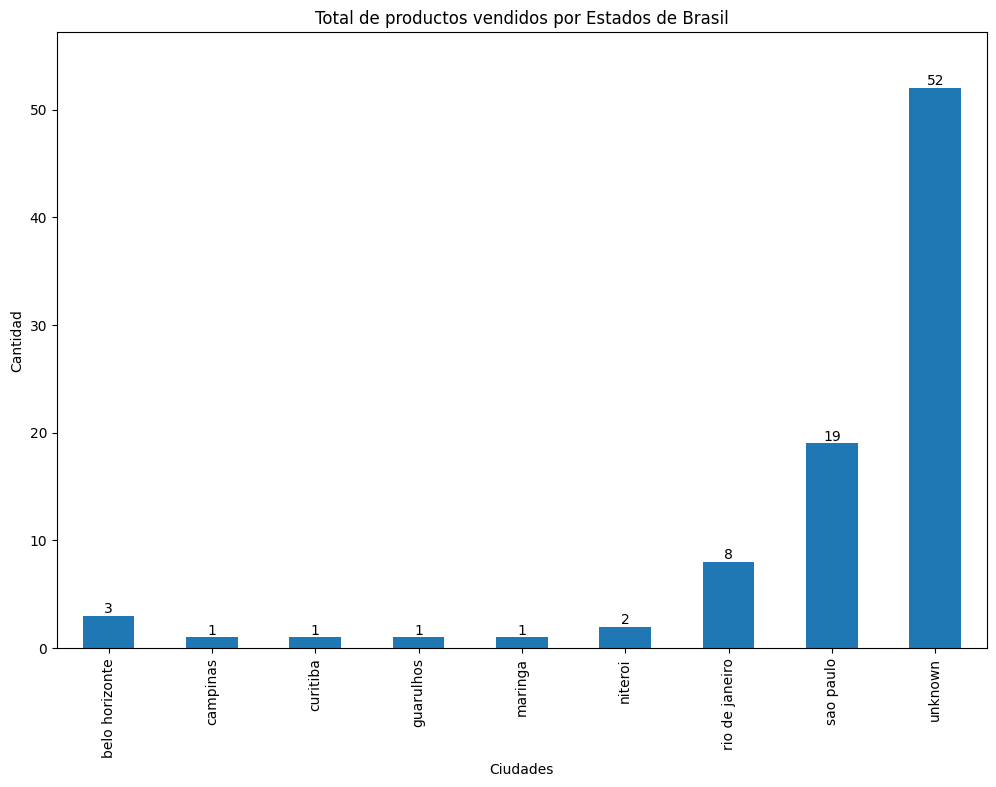

In [278]:
# Gráfico 1:
ax = df.value_counts(['city', 'product']).sort_index().loc[:, 0].plot(kind='bar', figsize=(12, 8), title='Total de productos vendidos por Estados de Brasil', xlabel='Ciudades', ylabel='Cantidad', legend=False)
ax.bar_label(ax.containers[0], label_type='edge')
ax.margins(y=0.1)

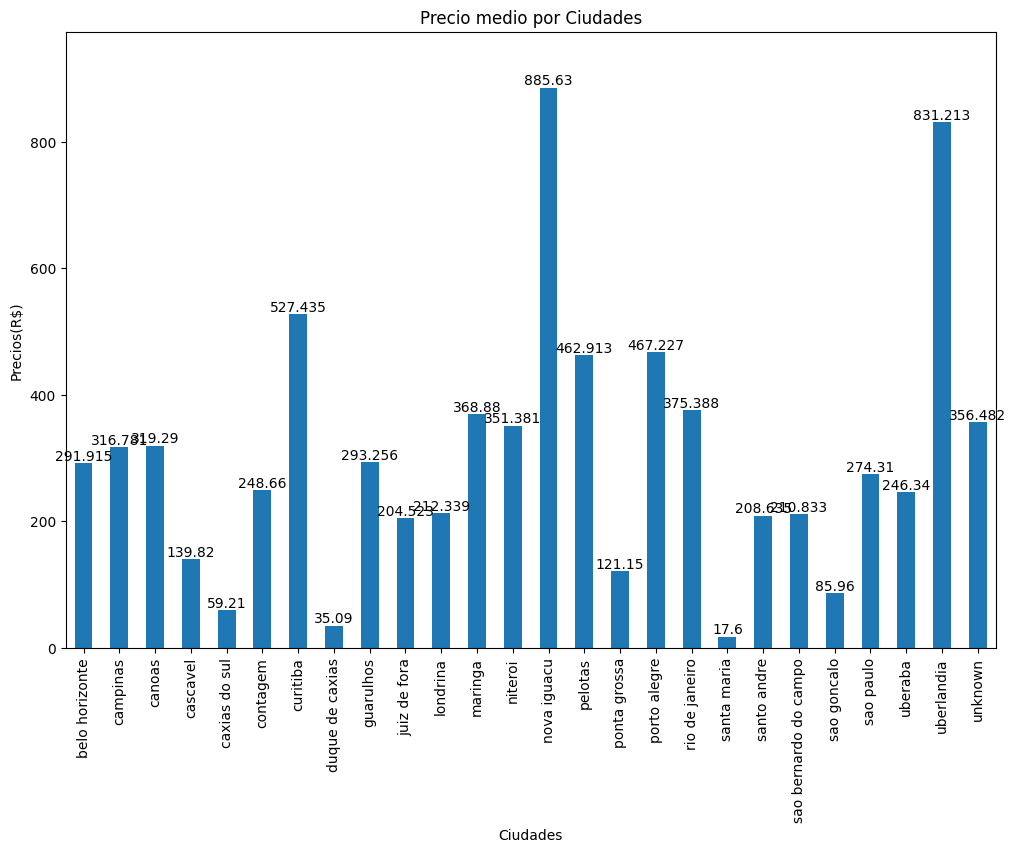

In [276]:
# Gráfico 2: [ TÍTULO DEL GRÁFICO ]
ax = df.groupby('city')['price'].mean().plot(kind='bar', figsize=(12, 8), title='Precio medio por Ciudades', xlabel='Ciudades', ylabel='Precios(R$)', legend=False)
ax.bar_label(ax.containers[0], label_type='edge')
ax.margins(y=0.1)

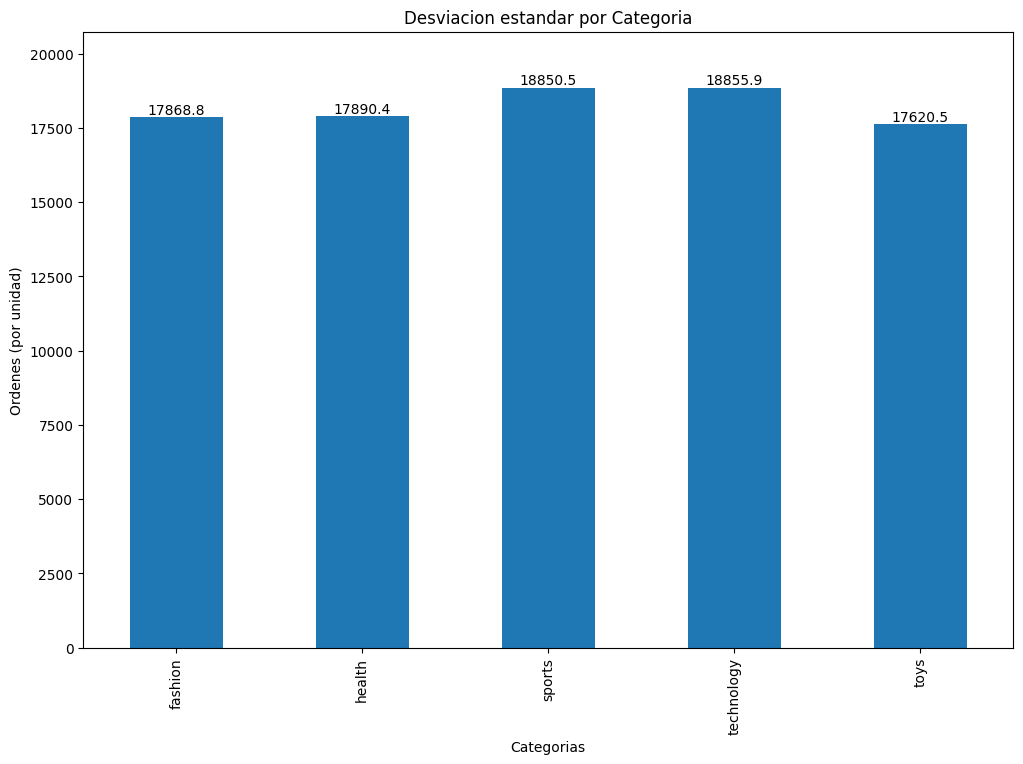

In [280]:
# Gráfico 3: [ TÍTULO DEL GRÁFICO ]

ax = df.groupby('category')['order'].std().plot(kind='bar', figsize=(12, 8), title='Desviacion estandar por Categoria', xlabel='Categorias', ylabel='Ordenes (por unidad)', legend=False)
ax.bar_label(ax.containers[0], label_type='edge')
ax.margins(y=0.1)

# 4. Marketing ama los gráficos. Pero el CEO es una persona de números. Te pide un informe con 3 estadísticas MUY interesantes y NUEVAS de los datos.

⁉️ **Consideración:** Debes de generar tres códigos, cada uno debe generar estadísticas (ejemplo: números, DataFrame, Series, etc.) que aporten información valiosa para **AMAZOFF**. ¡La información debe ser diferente a la que aportan los gráficos de la pregunta 3. Para que cuente como estadística interesante, no puede ser simplemente calcular un promedio o una desviación. ¡Debes de modificar los datos, filtrarlos, agruparlos, u otros!

ℹ️ **HINT 1:** Funciones como `groupby`, `rolling`, `resample`, calcular estadísticas con filtros, por grupos, etc... son métodos que generan estadísticas más interesantes.

ℹ️ **HINT 2:** La forma más fácil es mezclar métodos avanzados con cálculos descriptivos básicos (ejemplo: media, mediana, moda, desviación, percentiles, etc.).

ℹ️ **HINT 3:** ¡Explica cómo tu estadística puede ser útil para **AMAZOFF**!

📖 **Referencia Externa:** [Pandas Data Analysis](https://medium.com/@anshulika12/deep-dive-into-pandas-and-numpy-advanced-data-analysis-techniques-3b381ad31785).

---

✅ **Explicación:**

- **Estadística 1:** [ AGREGA TU RESPUESTA ACÁ ]
- **Estadística 2:** [ AGREGA TU RESPUESTA ACÁ ]
- **Estadística 3:** [ AGREGA TU RESPUESTA ACÁ ]

In [ ]:
# Estadística 1: [ TÍTULO DE LA ESTADÍSTICA ]

# [ AQÚI VA TU CÓDIGO ]

In [ ]:
# Estadística 2: [ TÍTULO DE LA ESTADÍSTICA ]

# [ AQÚI VA TU CÓDIGO ]

In [ ]:
# Estadística 3: [ TÍTULO DE LA ESTADÍSTICA ]

# [ AQÚI VA TU CÓDIGO ]

# 5. [ ERROR ] Detectamos que el rating va de 1-5, pero nuestros sistemas solo toleran ratings normalizados. ¿Nos puedes ayudar?

⁉️ **Consideración:** En ejercicio deberás Normalizar y Estandarizar. Pero sobre todo, se busca profundizar sobre cuándo se utilizaría cada medida. Por lo que debes de pensar en ejemplos de negocios donde aplicarías una técnica o la otra.

ℹ️ **HINT:** Imagina diferentes escenarios donde la escala para el negocio podría ser relevante. Enfócate en las características del negocio, no en un tema técnico (mal enfoque: el sistema interno lo requiere).

📖 **Referencia Externa:** [Normalization](https://www.geeksforgeeks.org/data-normalization-with-pandas/).

---

✅ **Explicación:**

- **¿En qué casos utilizarías normalización?** [ AGREGA TU RESPUESTA ACÁ ]
- **¿En qué casos utilizarías estandarización?** [ AGREGA TU RESPUESTA ACÁ ]
- **¿Qué otra columa del DataFrame crees que se podría normalizar o estandarizar?** [ AGREGA TU RESPUESTA ACÁ ]

In [ ]:
# Normalización

minmax = # [ AGREGA TU CÓDIGO AQUÍ ]
df['minmax_rating'] = minmax.fit_transform(df[['rating']])

In [ ]:
# Estandarización

std = # [ AGREGA TU CÓDIGO AQUÍ ]
df['std_rating'] = # [ AGREGA TU CÓDIGO AQUÍ ]

In [ ]:
# ¡No modificar esta celda! Gráficos de Ratings normalizados. Fíjate en el eje x.

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df.rating, kde=True, ax=ax[0], color='skyblue')
sns.histplot(df.minmax_rating, kde=True, ax=ax[1], color='salmon')
sns.histplot(df.std_rating, kde=True, ax=ax[2], color='lightgreen')

ax[0].set_title('Rating')
ax[1].set_title('Rating (MinMax)')
ax[2].set_title('Rating (Standard)')

plt.tight_layout()
plt.show()

# 6. El CEO está interesado en simplificar el análisis de datos complejos sin perder información crucial. ¿Puedes aplicar una técnica de reducción de dimensionalidad como PCA y explicar los resultados?

⁉️ **Consideración:** Primero, crea nuevas features. Utilizarás esas y otra features para hacer una reducción de dimensionalidad. No olvides escalar tus datos antes. La parte compleja de este ejercicio es explicar tus hallazgos en el gráfico de PCA con 2 componentes.

ℹ️ **HINT:** ¿Ves una tendencia en los colores del gráfico? ¿Grupos?

📖 **Referencia Externa:** [Python PCA](https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/).

---

✅ **Explicación:**

[ AGREGA TU RESPUESTA ACÁ ]

In [ ]:
# ¡No modificar esta celda! Agregaremos más datos al dataframe.

# Hora de compra y entrega.
df['purchase_hour'] = df.purchased.dt.hour
df['delivery_hour'] = df.delivered.dt.hour

# Día de la semana de compra y entrega.
df['purchase_weekday'] = df.purchased.dt.weekday
df['delivery_weekday'] = df.delivered.dt.weekday

# Precio del producto versus precio del envío.
df['price_shipping_rate'] = df.price/(df.price+df.shipping)

# Precio y envío ajustados por los percentiles 20 y 80.
df['pricing_clipped'] = df.price.clip(df.price.quantile(0.2), df.price.quantile(0.8))
df['shipping_clipped'] = df.shipping.clip(df.shipping.quantile(0.2), df.shipping.quantile(0.8))

In [ ]:
# ¿Qué columnas deberíamos considerar para un análisis de componentes principales?

cols_pca = [
    # [ AGREGA TU CÓDIGO AQUÍ ]
]

# ¿Qué método de escalamiento deberíamos utilizar?

scaler = # [ AGREGA TU CÓDIGO AQUÍ ]
df_scaled = scaler.# [ AGREGA TU CÓDIGO AQUÍ ]
df_scaled = pd.DataFrame(df_scaled, columns=cols_pca)
df_scaled.head(3)

In [ ]:
# Genera un modelo de PCA con 2 componentes y ajusta el modelo a los datos escalados.

pca = # [ AGREGA TU CÓDIGO AQUÍ ]
df[['component_1', 'component_2']] = pca.fit_transform# [ AGREGA TU CÓDIGO AQUÍ ]
df.head(3)

In [ ]:
# Gráfico de componentes principales según rating. ¿Qué puedes inferir de este gráfico?
# HINT: Utiliza el parámetro hue para colorear los puntos según el rating.

sns.scatterplot(
    data=df,
    x=# [ AGREGA TU CÓDIGO AQUÍ ]
    y=# [ AGREGA TU CÓDIGO AQUÍ ]
    hue=# [ AGREGA TU CÓDIGO AQUÍ ]
    palette='RdYlBu',
    legend='full'
)

plt.title('Componentes Principales')
plt.show()

In [ ]:
# ¿Cuánta varianza explica cada componente?

print(f'Varianza explicada por cada componente: {pca.explained_variance_ratio_}')
print(f'Varianza explicada total: {# [ AGREGA TU CÓDIGO AQUÍ ]

> # ¡NO OLVIDES GUARDAR Y SUBIR EL NOTEBOOK A LA PLATAFORMA CUANDO TERMINES! FORMATO .ipynb